[opencv tutorial doc](https://docs.opencv.org/4.7.0/d2/dbd/tutorial_distance_transform.html)

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 90

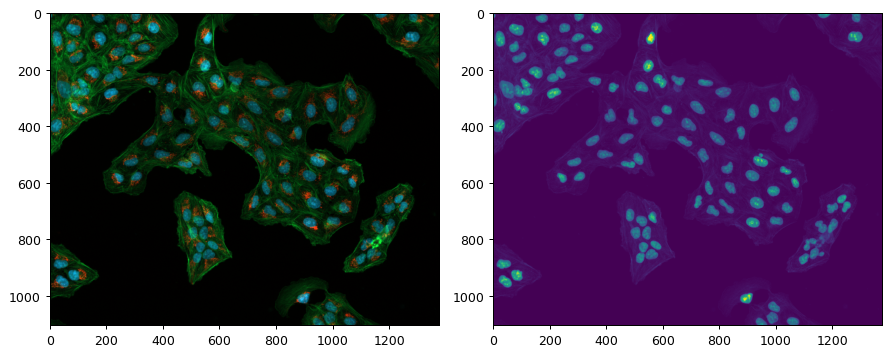

In [49]:
img = cv2.imread("images/Osteosarcoma_01.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cells = img[:, :, 2]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[1].imshow(cells)
plt.tight_layout()
plt.show()

In [16]:
pixels_to_um = 0.454 # from metadata of original image

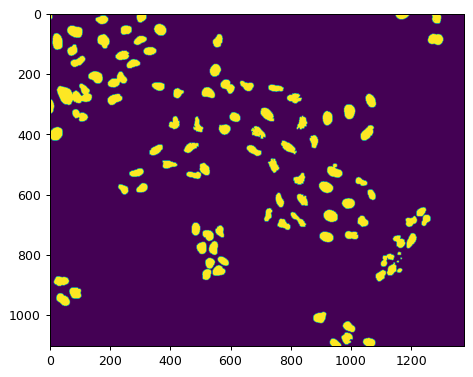

In [19]:
# convert to binary image
_, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# denoise image (opening)
kernel = np.ones((3, 3), dtype=np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening);

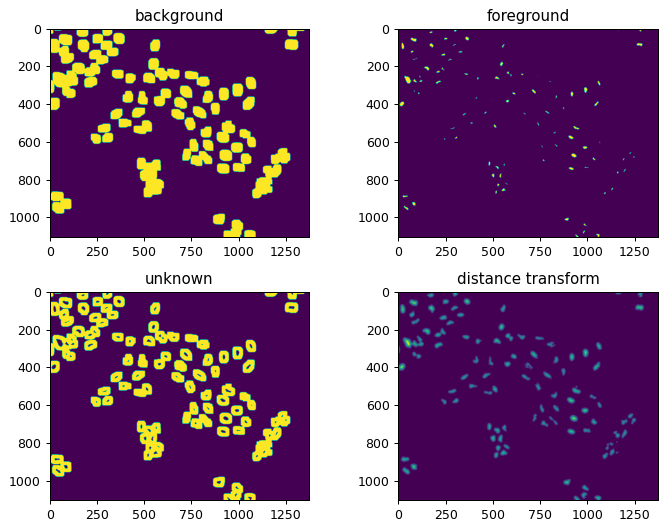

In [32]:
# dilating cell boundary and set to background
background = cv2.dilate(opening, kernel, iterations=10)
# calculate distance from boundary (pixel value == 0)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# using the result of distance transform, binarize image
_, foreground = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
foreground = foreground.astype(np.uint8)
# ambiguous region
unknown = cv2.subtract(background, foreground)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()
axes[0].imshow(background)
axes[0].set_title('background')
axes[1].imshow(foreground)
axes[1].set_title('foreground')
axes[2].imshow(unknown)
axes[2].set_title('unknown')
axes[3].imshow(dist_transform)
axes[3].set_title('distance transform')
plt.tight_layout()
plt.show()

In [144]:
# labeling
_, markers = cv2.connectedComponents(foreground)
markers = markers + 10 # prevent background to be 0.
markers[unknown==255] = 0 # unknonwn to 0

# watershed filling
markers = cv2.watershed(img, markers) # boundary == -1

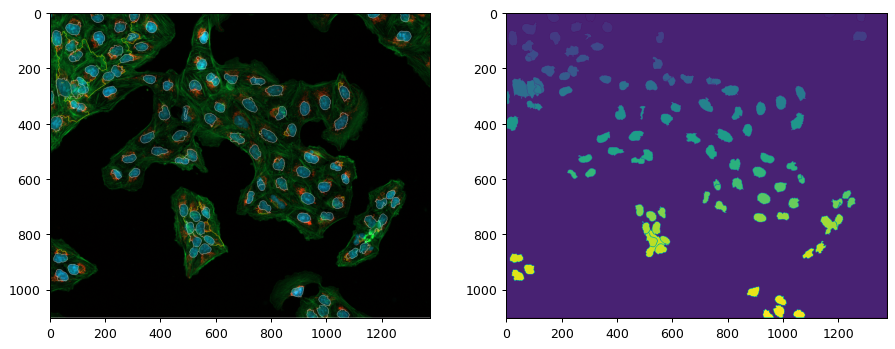

In [148]:
img[markers==-1] = [255, 255, 255]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img)
axes[1].imshow(markers)
plt.show()